In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
# load dataset
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
#from sklearn.cross_validation import  train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
#from sklearn.grid_search import GridSearchCV2 #Perforing grid search
from scipy.stats import skew
from collections import OrderedDict
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.

In [2]:
train = pd.read_csv("/content/train.csv",header=0)
test = pd.read_csv("/content/test.csv",header=0)
print(train.shape,test.shape)

(649912, 15) (284071, 9)


              id    sat_id         x  ...       a_x       a_y       a_z
id      1.000000  0.999120  0.027327  ...  0.000011  0.000012 -0.000013
sat_id  0.999120  1.000000  0.028011  ...  0.000010  0.000011 -0.000013
x       0.027327  0.028011  1.000000  ... -0.430604 -0.003673  0.016059
y      -0.001322 -0.000506  0.044200  ... -0.024702 -0.419122 -0.006636
z       0.034819  0.035870 -0.040504  ... -0.007523 -0.025050 -0.414882
Vx      0.000286  0.000302  0.001396  ... -0.095614 -0.061593  0.007316
Vy     -0.000195 -0.000184 -0.036903  ...  0.012801 -0.089633 -0.094351
Vz      0.000274  0.000287 -0.001782  ... -0.013186  0.110529 -0.164578
x_sim   0.023244  0.023897  0.959740  ... -0.480241 -0.011063  0.005628
y_sim  -0.002180 -0.001355  0.026356  ... -0.020951 -0.472396 -0.011712
z_sim   0.032539  0.033541 -0.044701  ...  0.004545 -0.025193 -0.470398
Vx_sim  0.000150  0.000160 -0.012890  ... -0.158954 -0.081507 -0.008630
Vy_sim -0.000066 -0.000051 -0.032230  ...  0.071659 -0.159813 -0

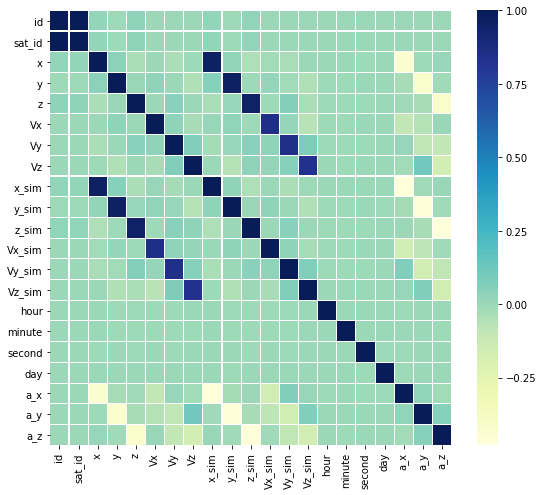

In [25]:

corrmat = train.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 
print(corrmat)

In [3]:

def date_time_extract(a,count):
    if count == 0:
        print('extracting date, time, hour......for train data')
        train['hour'] = pd.DatetimeIndex(a).hour
        train['minute'] = pd.DatetimeIndex(a).minute
        train['second'] = pd.DatetimeIndex(a).second
        train['day'] = pd.DatetimeIndex(a).day
        print('extraction of date_time_hour done.........!!')
    else:
        print('extracting date, time, hour......for test data')
        test['hour'] = pd.DatetimeIndex(a).hour
        test['minute'] = pd.DatetimeIndex(a).minute
        test['second'] = pd.DatetimeIndex(a).second
        test['day'] = pd.DatetimeIndex(a).day
        print('extraction of date_time_hour done.........!!')
    
    count+=1
    
    
    

date_time_extract(train['epoch'],0)
date_time_extract(test['epoch'],1)

extracting date, time, hour......for train data
extraction of date_time_hour done.........!!
extracting date, time, hour......for test data
extraction of date_time_hour done.........!!


In [0]:
def get_acceleration(a,b,c,count):
    a1 = []
    a2 = []
    a3 = []
    
    #a1.append(0)
    #a2.append(0)
    #a3.append(0)
    
    a1 = np.asarray(a)
    a2 = np.asarray(b)
    a3 = np.asarray(c)
    
    b1 = []
    b2 = []
    b3 = []
    
    if count == 0:
    
        for i in range(len(np.asarray(train['hour']))-1):
            #print('extracting acceleration in 3-D....')
            b1.append((a1[i+1]-a1[i]))
            b2.append((a2[i+1]-a2[i]))
            b3.append((a3[i+1]-a3[i]))
        
        b1.append(a[len(a)-1])
        b2.append(b[len(a)-1])
        b3.append(c[len(a)-1])
    
        print('extraction done!!')
    
        print('loading acceleration values in train...')
        train['a_x'] = np.asarray(b1)
        train['a_y'] = np.asarray(b2)
        train['a_z'] = np.asarray(b3)
        print('loaded acc values in train...')
    
    else:
        
        for i in range(len(np.asarray(test['hour']))-1):
            #print('extracting acceleration in 3-D....')
            b1.append((a1[i+1]-a1[i]))
            b2.append((a2[i+1]-a2[i]))
            b3.append((a3[i+1]-a3[i]))
        
        b1.append(a[len(a)-1])
        b2.append(b[len(a)-1])
        b3.append(c[len(a)-1])
        
        
        
        
        print('loading acceleration values in test')
        test['a_x'] = np.asarray(b1)
        test['a_y'] = np.asarray(b2)
        test['a_z'] = np.asarray(b3)
        print('loaded acc values in test')
    
    
        

In [5]:
get_acceleration(train['Vx_sim'],train['Vy_sim'],train['Vz_sim'],0)
get_acceleration(test['Vx_sim'],test['Vy_sim'],test['Vz_sim'],1)

extraction done!!
loading acceleration values in train...
loaded acc values in train...
loading acceleration values in test
loaded acc values in test


In [0]:
def get_features(t,count):
    if count == 0:
        feature_df_train = train[['Vx_sim', 'Vy_sim', 'Vz_sim', 'x_sim', 'y_sim', 'z_sim','a_x','a_y','a_z']]
        return feature_df_train
    
    else:
        feature_df_test = test[['Vx_sim', 'Vy_sim', 'Vz_sim', 'x_sim', 'y_sim', 'z_sim','a_x','a_y','a_z']]
        return feature_df_test
    

In [0]:
x_train = get_features(train,0)
x_train = np.asarray(x_train)
x_test = get_features(test,1)
x_test = np.asarray(x_test)

In [0]:
def get_target_variable(x):
    return np.asarray(x)


In [0]:
y_x = get_target_variable(train['x'])
y_y = get_target_variable(train['y'])
y_z = get_target_variable(train['z'])

y_vx = get_target_variable(train['Vx'])
y_vy = get_target_variable(train['Vy'])
y_vz = get_target_variable(train['Vz'])

In [0]:
x_train_split,x_val_split,y_train_x,y_val_x,y_train_y,y_val_y,y_train_z,y_val_z,y_train_vx, y_val_vx,y_train_vy,y_val_vy, y_train_vz,y_val_vz = train_test_split(x_train,y_x,y_y,y_z,y_vx,y_vy,y_vz,test_size = 0.3,random_state = 5)

In [0]:
##### defining the score

def smape(satellite_predicted_values, satellite_true_values): 
    # the division, addition and subtraction are pointwise 
    beta = np.mean(np.abs((satellite_predicted_values - satellite_true_values) 
        / (np.abs(satellite_predicted_values) + np.abs(satellite_true_values))))
    return 100*(1-beta)

def Mean_abs_error(Y_true,Y_pred):
    
    return mean_absolute_error(Y_true,Y_pred)


In [0]:

# this is best till now
#n_estimators = 3000

def xgb_model_evaluation(x_train_split,x_val_split,y_train_x,y_val_x,x_test):
    #n_Estimators = 10000
    model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.1,
                 max_depth=6,
                 min_child_weight=1.5,
                 n_estimators=3000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
    #print('all parameters enabled--->')
    print('train for y_train_x !!------>')
    
    model.fit(x_train_split,y_train_x)
    
    print('training for y_train_x completed-------->prediction started for y_val_x')
    
    a = model.predict(x_val_split)
    
    print('prediction for y_val_x completed------> evaluating result for validation data')
    
    print('the score for validation obtained is:',smape(a,y_val_x))
    print('the Mean_abs_error VALIDATION for train is:', Mean_abs_error(a,y_val_x))
    
    
    print('evaluating results for train---->')
    a = model.predict(x_train_split)
    print('the smape score for train obtained is:',smape(a,y_train_x))
    print('the Mean_abs_error obtained for train is:', Mean_abs_error(a,y_train_x))
    print('prediction of test has been started')
    
    a = np.asarray(model.predict(x_test))
    print('test values predicted successfully------> Moving to the next step now')
    return a,model
    
    
    



In [0]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 
import timeit



#Your statements here


  
# load the boston dataset 
#boston = datasets.load_boston(return_X_y=False) 
  
# defining feature matrix(X) and response vector(y) 
#X = boston.data 
#y = boston.target 
  
# splitting X and y into training and testing sets 
#from sklearn.model_selection import train_test_split 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
#                                                    random_state=1) 
  
# create linear regression object 


def lr_model_evaluation(x_train_split,x_val_split,y_train_x,y_val_x,x_test):
    #n_Estimators = 10000
    start = timeit.default_timer()
    reg = linear_model.LinearRegression() 
    #print('all parameters enabled--->')
    print('train for y_train_x !!------>')
    
    reg.fit(x_train_split,y_train_x)
    
    print('training for y_train_x completed-------->prediction started for y_val_x')
    
    a = reg.predict(x_val_split)
    
    print('prediction for y_val_x completed------> evaluating result for validation data')
    
    print('the score for validation obtained is:',smape(a,y_val_x))
    print('the Mean_abs_error VALIDATION for train is:', Mean_abs_error(a,y_val_x))
    
    
    print('evaluating results for train---->')
    a = reg.predict(x_train_split)
    print('the smape score for train obtained is:',smape(a,y_train_x))
    print('the Mean_abs_error obtained for train is:', Mean_abs_error(a,y_train_x))
    print('prediction of test has been started')
    
    a = np.asarray(reg.predict(x_test))
    print('test values predicted successfully------> Moving to the next step now')
    stop = timeit.default_timer()

    print('Time: ', stop - start)
    return a,reg


In [21]:
# xgb model for y_train_x
y_test_x, model_x = lr_model_evaluation(x_train_split,x_val_split,y_train_x,y_val_x,x_test)

train for y_train_x !!------>
training for y_train_x completed-------->prediction started for y_val_x
prediction for y_val_x completed------> evaluating result for validation data
the score for validation obtained is: 79.31363154196056
the Mean_abs_error VALIDATION for train is: 3501.824625840138
evaluating results for train---->
the smape score for train obtained is: 79.39485239487367
the Mean_abs_error obtained for train is: 3477.626453076312
prediction of test has been started
test values predicted successfully------> Moving to the next step now
Time:  0.1547235960006219


In [17]:
# xgb model for y_train_y
y_test_y, model_y =lr_model_evaluation(x_train_split,x_val_split,y_train_y,y_val_y,x_test)

train for y_train_x !!------>
training for y_train_x completed-------->prediction started for y_val_x
prediction for y_val_x completed------> evaluating result for validation data
the score for validation obtained is: 78.76379069358265
the Mean_abs_error VALIDATION for train is: 3542.353357817838
evaluating results for train---->
the smape score for train obtained is: 78.78790397129873
the Mean_abs_error obtained for train is: 3519.0328799073186
prediction of test has been started
test values predicted successfully------> Moving to the next step now


In [22]:
# xgb model for y_train_x
y_test_z, model_z = lr_model_evaluation(x_train_split,x_val_split,y_train_z,y_val_z,x_test)

train for y_train_x !!------>
training for y_train_x completed-------->prediction started for y_val_x
prediction for y_val_x completed------> evaluating result for validation data
the score for validation obtained is: 75.92073043387117
the Mean_abs_error VALIDATION for train is: 2719.14078773227
evaluating results for train---->
the smape score for train obtained is: 75.96060243633337
the Mean_abs_error obtained for train is: 2698.76818932576
prediction of test has been started
test values predicted successfully------> Moving to the next step now
Time:  0.1477196340001683


In [23]:
# xgb model for y_train_vx
y_test_vx, model_vx = lr_model_evaluation(x_train_split,x_val_split,y_train_vx,y_val_vx,x_test)

train for y_train_x !!------>
training for y_train_x completed-------->prediction started for y_val_x
prediction for y_val_x completed------> evaluating result for validation data
the score for validation obtained is: 76.07332345661719
the Mean_abs_error VALIDATION for train is: 0.7299479400930514
evaluating results for train---->
the smape score for train obtained is: 76.13461004768236
the Mean_abs_error obtained for train is: 0.7282925573646793
prediction of test has been started
test values predicted successfully------> Moving to the next step now
Time:  0.1446128289999251
